# Time Series Analysis Exercise

In this section, we will learn how to use Python to analyze financial time series.

Time series data is an important form of structured data in many different fields, such as **finance**, **economics**, **ecology**, **neuroscience**, or **physics**. Anything that is observed or measured at many points in time forms a time series. Time series can be have a **fixed frequency**: data points occur at regular intervals according to some rule, e.g., every 2 seconds. Time series can also be **irregular** without a fixed offset between data points.

## Step 1: Load Libraries

In [53]:
%matplotlib inline

from matplotlib import pyplot as plt

import pandas as pd
import pandas.io.data as web
import datetime

## Step 2: Load Data

We can load the data for this section using *pandas'* `read_csv(file_path, parse_dates=True, index_col=0)` command and assign the result to a new variable `df`. In that statement, replace `file_path` with the file path for the *Stock_px.csv* file on your computer, i.e., *"data/Stock_px.csv"*:

In [28]:
# Load the data into Python
# slide 63
import pandas as pd
df = pd.read_csv('data/Stock_px.csv', parse_dates=True, index_col=0)

Python's pandas library provides powerful functionalities to load data from different sources, including *CSV files*, *Excel files*, and various *database systems*. Once loaded, the data is represented as a `DataFrame`. `DataFrame` is one of the most commonly used data types in pandas. You can think of a `DataFrame` as an Excel spreadsheet or an SQL table in Python.

[Help: Using Pandas To Read Data From Different Sources](http://pandas.pydata.org/pandas-docs/stable/io.html)

*pandas'* `info()` command prints a summary of the `DataFrame` which we just created. Type `df.info()` into the following cell:

In [4]:
# Display a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5472 entries, 1990-02-01 to 2011-10-14
Data columns (total 9 columns):
AA      5472 non-null float64
AAPL    5472 non-null float64
GE      5472 non-null float64
IBM     5472 non-null float64
JNJ     5472 non-null float64
MSFT    5472 non-null float64
PEP     5471 non-null float64
SPX     5472 non-null float64
XOM     5472 non-null float64
dtypes: float64(9)
memory usage: 427.5 KB


We can use the `head()` command to look at the first few rows of the data we loaded. Type `df.head()` into the following cell:

In [9]:
# Display he first few rows of the dataset
df.tail()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2011-10-10,10.09,388.81,16.14,186.62,64.43,26.94,61.87,1194.89,76.28
2011-10-11,10.30,400.29,16.14,185.00,63.96,27.00,60.95,1195.54,76.27
2011-10-12,10.05,402.19,16.40,186.12,64.33,26.96,62.70,1207.25,77.16
2011-10-13,10.10,408.43,16.22,186.82,64.23,27.18,62.36,1203.66,76.37
2011-10-14,10.26,422.00,16.60,190.53,64.72,27.27,62.24,1224.58,78.11


We can type `df.columns` to list the column names in our data set. Type `df.columns` into the following cell:

In [7]:
# Display column names
df.columns

Index(['AA', 'AAPL', 'GE', 'IBM', 'JNJ', 'MSFT', 'PEP', 'SPX', 'XOM'], dtype='object')

In addition, it is always a good idea to test the dimensionality of the imported data using the `shape` command. This is important to make sure we have really loaded all of the data correctly. The `shape` command produces two values; the first is the number of rows, the is second the number of columns. This functionality becomes particularly powerful when working with *higher-dimensional* datasets.

Enter `df.shape` into the following cell to see if the data was loaded correctly:

In [8]:
# Check dimensionality
df.shape

(5472, 9)

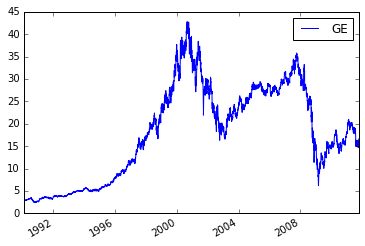

In [30]:
dfge = df[['GE']]
dfge.plot()
plt.show()

## Step 3: Data Visualization

Execute the following cell to visualize the time series data we loaded in *step 2*:

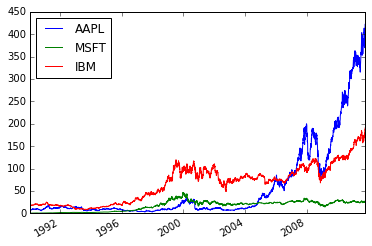

In [33]:
# Select tickers/columns to display
df_tech = df[["AAPL", "MSFT", "IBM"]]

# Create plot
df_tech.plot()

# Show plot on screen
plt.show()


/Users/mkudija/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


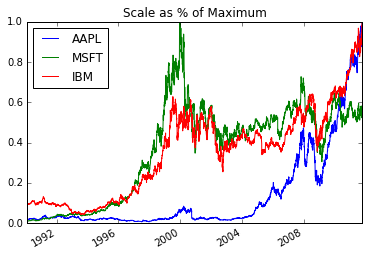

In [34]:
# scale as percentage of maximum
for item in df_tech.columns:
    df_tech[item] = df_tech[item]/df_tech[item].max()
df_tech.plot()
plt.title('Scale as % of Maximum')
plt.show()

/Users/mkudija/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


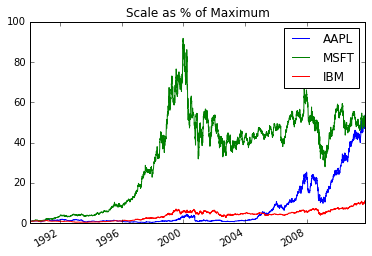

In [35]:
# scale as percentage of starting value
for item in df_tech.columns:
    df_tech[item] = df_tech[item]/df_tech[item][0]
df_tech.plot()
plt.title('Scale as % of Maximum')
plt.show()

## Step 4: Data Manipulation

In the next cell, resample the time series data to "Quarter End Frequency" and visualize the results in a plot:

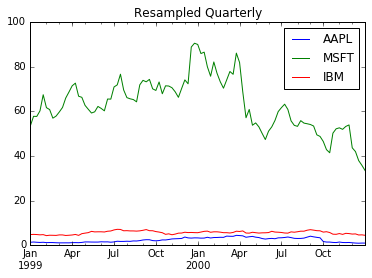

In [54]:
# slide 66
# Resample values in df and assign to new variable df_q
df_q = df_tech.resample('W').ffill()

# Visualize values stored in df_q
df_q['1999':'2000'].plot()
plt.title('Resampled Quarterly')
plt.show()


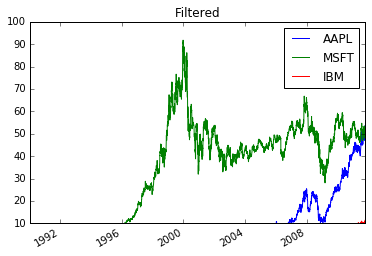

In [56]:
# scale as percentage of maximum
df_filtered = df_tech[df_tech > 10]
df_filtered.plot()
plt.title('Filtered')
plt.show()

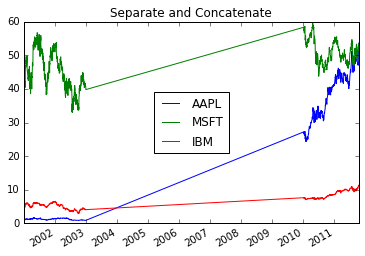

In [61]:
# slide 68
df_tech1 = df_tech["2001":"2002"]
df_tech2 = df_tech["2010":"2011"]
df_comb = pd.concat([df_tech1, df_tech2])

df_comb.plot()
plt.title('Separate and Concatenate')
plt.show()

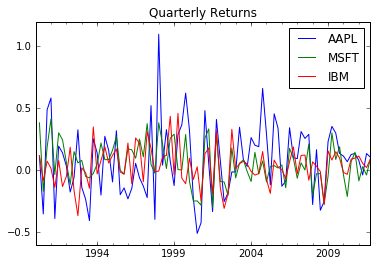

In [70]:
# slide 69
df_q = df_tech.resample('Q').ffill()
returns = df_q.pct_change(periods=1)
returns.plot()
plt.title('Quarterly Returns')
plt.show()

See [here for documentation on pct_chagne](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.pct_change.html). 

[Help: Frequency String Documentation](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)

**Bonus Exercise:** Experiment with other frequencies.

#### *REVISIT THIS BELOW*

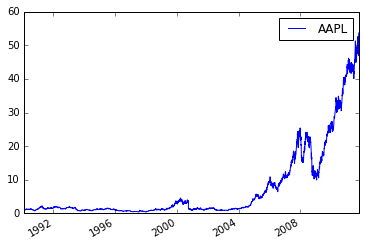

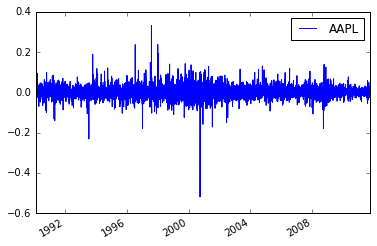

In [86]:
returns = df[["AAPL"]].pct_change()
ret_index = (1 + returns).cumprod() 
#ret_index.ix[0, 0] = 1 # setting first value to 1
#print(ret_index.ix[0, 0])
ret_index.plot()
returns.plot()
plt.show()

## Step 5: Compute Simple Statistics

We can compute different statistics directly on the `DataFrame`. Using the code from the slides, calculate the mean, standard deviation, correlation, and minimum/maximum values for the data in `df`:

In [90]:
# Calculate mean
print('\n\nmean -\n', df.mean())

# Calculate standard deviation
print('\n\nstd -\n', df.std())

# Calculate correlation
print('\n\ncorr -\n', df.corr())

# Extract minimum and maximum values
print('\n\nmin -\n', df.min())
print('\n\nmax -\n', df.max())




mean -
 AA       17.440285
AAPL     57.119313
GE       17.933194
IBM      66.637730
JNJ      34.225340
MSFT     17.046345
PEP      34.284204
SPX     945.035216
XOM      35.225919
dtype: float64


std -
 AA        9.647999
AAPL     88.670423
GE       10.647635
IBM      41.689481
JNJ      19.726666
MSFT     11.000988
PEP      18.383894
SPX     369.494672
XOM      23.967647
dtype: float64


corr -
             AA      AAPL        GE       IBM       JNJ      MSFT       PEP  \
AA    1.000000  0.101313  0.916804  0.600211  0.685752  0.776796  0.634679   
AAPL  0.101313  1.000000  0.142381  0.749037  0.651564  0.423274  0.741942   
GE    0.916804  0.142381  1.000000  0.681659  0.717824  0.875398  0.652904   
IBM   0.600211  0.749037  0.681659  1.000000  0.902894  0.871615  0.885029   
JNJ   0.685752  0.651564  0.717824  0.902894  1.000000  0.846906  0.970478   
MSFT  0.776796  0.423274  0.875398  0.871615  0.846906  1.000000  0.781791   
PEP   0.634679  0.741942  0.652904  0.885029  0.97047

## Step 6: Compute Bollinger Bands

Compute and visualize the Bollinger Bands in the following cell. You can use the code from the slides as a reference.

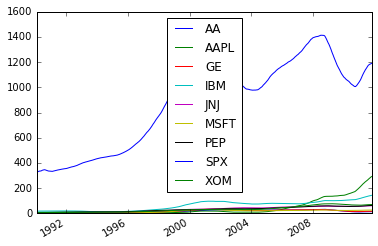

In [96]:
# slide 72 - NEED TO DO THIS...

# Select data


# Compute moving average, upper, and lower bands
moving_avg = df.rolling(window=500, min_periods=1).mean()
exp_avg = df.expanding(min_periods=1).mean()

# Visualize results
moving_avg.plot()
plt.show()


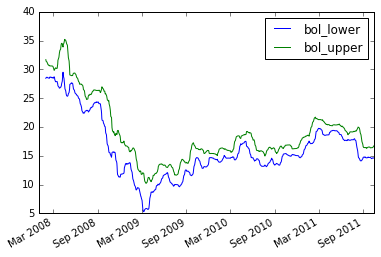

In [110]:
##DO BOLLINGER BAND FROM SLIDE 73
##NEED TO REVIEW AND UNDERSTAND THIS


ticker = "GE"
df = pd.read_csv('data/Stock_px.csv', parse_dates=True, index_col=0) 
df = df[[ticker]] # Select columns
df = df["2008":"2011"] # Select date range
# Compute moving average, upper, and lower bands 
df["moving_avg"] = df[ticker].rolling(window=20).mean() 
df["bol_upper"] = df["moving_avg"] + 2 * df[ticker].rolling(min_periods=20, window=20).std() 
df["bol_lower"] = df["moving_avg"] - 2 * df[ticker].rolling(min_periods=20, window=20).std()
ax = df[['bol_lower','bol_upper']].plot()
plt.show()

Read more about [Bollinger Bands](https://en.wikipedia.org/wiki/Bollinger_Bands)

**Bonus Exercise:** Compute the Bollinger Bands for other companies and experiment with different date ranges.

## Step 7: Correlation Between Stocks

In [ ]:
# Load data


# Calculate and store returns


# Calculate correlation between variables


# Visualize results



[Help: Pandas' Computational Tools](http://pandas.pydata.org/pandas-docs/version/0.18.1/computation.html)

## Step 8: Regression Analysis (Requires Internet Access)

In this last section, we want to download live stock data from *Yahoo! Finance* and perform a regression analysis on the data.

pandas can download data from different sources, including *Yahoo! Finance*, *Google Finance*, and the *World Bank*. Execute the following cell to download data from *Yahoo! Finance*:

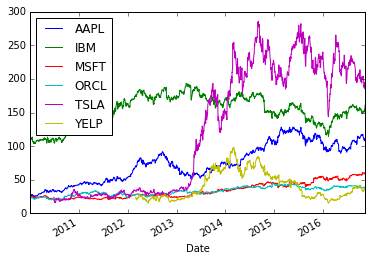

In [111]:
# Define tickers
stocks = ['ORCL', 'TSLA', 'IBM', 'YELP', 'MSFT', 'AAPL']

# Define date range
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime.now()

# Fetch data from the internet
df = web.DataReader(stocks, 'yahoo', start, end)['Adj Close']

# Visualize data
df.plot()
plt.show()

Using the `df.corr()` command, we can easily compute and visualize the correlations between the stocks we downloaded in the previous step:

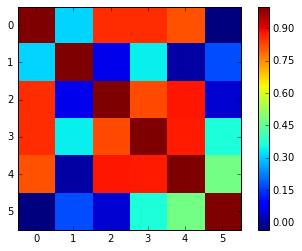

In [112]:
corrs = df.corr()
plt.imshow(corrs, interpolation='nearest')
plt.colorbar()

Using the code from the slides and the data loaded in the previous step, compute and visualize how the *beta* for the *Apple* and *Microsoft* stocks changes over time:

/Users/mkudija/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html


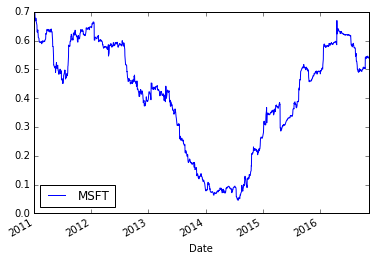


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <MSFT> + <intercept>

Number of Observations:         250
Number of Degrees of Freedom:   2

R-squared:         0.2635
Adj R-squared:     0.2605

Rmse:              0.0132

F-stat (1, 248):    88.7114, p-value:     0.0000

Degrees of Freedom: model 1, resid 248

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
          MSFT     0.5404     0.0574       9.42     0.0000     0.4280     0.6529
     intercept    -0.0003     0.0008      -0.38     0.7021    -0.0020     0.0013
---------------------------------End of Summary---------------------------------



In [137]:
# Store data for Apple and Microsoft in new variables
df = df[['AAPL','MSFT']]

# Calculate returns
aapl = df["AAPL"]
msft = df["MSFT"]

aapl_rets = aapl.pct_change() 
msft_rets = msft.pct_change()

# Fit OLS regression model
model = pd.ols(y=aapl_rets, x={"MSFT": msft_rets}, window=250)

# Visualize results
model.beta.plot(y=["MSFT"]) 
plt.show()

print(model)


One of the most popular uses of regression analysis is on *investment returns*, where the *market index* is independent while the *individual security* or *mutual fund* is dependent on the *market*. 

Make sure the data from *"data/Stock_px.csv"* is loaded and stored in a variable called `stock_px`:

In [130]:
# Reload data from Stock_px.csv and store in a variable called 'stock_px'
stock_px = pd.read_csv('data/Stock_px.csv', parse_dates=True, index_col=0)

Calculate the returns on the data you loaded in the previous step and store the result in a variable called `rets`.

/Users/mkudija/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html


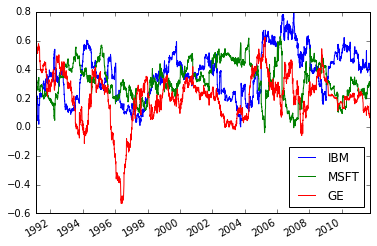


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <IBM> + <MSFT> + <GE> + <intercept>

Number of Observations:         250
Number of Degrees of Freedom:   4

R-squared:         0.4044
Adj R-squared:     0.3971

Rmse:              0.0120

F-stat (3, 246):    55.6777, p-value:     0.0000

Degrees of Freedom: model 3, resid 246

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
           IBM     0.3590     0.0924       3.88     0.0001     0.1778     0.5402
          MSFT     0.2562     0.0779       3.29     0.0011     0.1035     0.4088
            GE     0.1630     0.0636       2.56     0.0110     0.0383     0.2877
     intercept     0.0006     0.0008       0.84     0.4041    -0.0009     0.0021
---------------------------------End of Summary------------

In [135]:
df_sub = stock_px[["AAPL", "IBM", "MSFT", "GE"]]

# Compute returns
rets = df_sub.pct_change()

# Fit ordinary least-squares regression model
model = pd.ols(y=rets["AAPL"], x=rets.drop(["AAPL"], axis=1), window=250)

# Plot
model.beta.plot(y=["IBM", "MSFT", "GE"]) 
plt.show()

print(model)


Store the *Apple* and *S&P 500* returns in separate variables (e.g., *aapl_rets* and *spx_rets*):

Calculate and visualize the beta values for the two variables that hold the *Apple* and *S&P 500* return data:

In [ ]:
# Fit ordinary least-squares regression model


# Visualize beta



**Bonus Exercise:** Compute and visualize the relationships between the S&P 500 returns and a group of stocks.


# Slide 84 Additional Exercises
## Advertising


In [154]:
df_adv = pd.read_csv('data/Advertising.csv', parse_dates=True, index_col=0)
print(df_adv.info())
df_adv.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
Facebook    200 non-null float64
Twitter     200 non-null float64
LinkedIn    200 non-null float64
Sales       200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB
None


,Facebook,Twitter,LinkedIn,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [155]:
model_adv = pd.ols(y=df_adv['Sales'], x=df_adv.drop(["Sales"], axis=1), window=250)

print(model_adv)
#print(model)
#model.beta.plot(y=['Facebook', 'Twitter', 'LinkedIn']) 
#model.beta.plot(y=['Sales']) 
#plt.show()

#print(model)

/Users/mkudija/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  if __name__ == '__main__':


IndexError: index -1 is out of bounds for axis 0 with size 0